In [23]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#21 Which demographic patients are prone to get stroke

df = pd.read_excel("HospitalDatabase .xlsx", "Discharges")
dfs = df[df['PrimaryDiagnosis']=='Stroke']
dfp = pd.read_excel("HospitalDatabase .xlsx", "Patients")
df_stroke = (dfp.loc[(dfs.PatientID)])
df_count = df_stroke.groupby(['Gender','Race'])['PatientID'] \
.count() \
.reset_index(name ='Number of Patients') \
.sort_values(['Number of Patients'],ascending=False) \
.head(1)
df_count[['Gender','Race']]

,Gender,Race
2,Male,Black/African-American


In [34]:
#22 Create a dataframe with acuity and EDDisposition as the indices and count of number of patients as the value

df = pd.read_excel("HospitalDatabase .xlsx", "EDVisits")
df1 = df.groupby(['Acuity','EDDisposition'])['PatientID']\
.count() \
.reset_index(name = 'Count of No. of Patients')
df2=df1.set_index(['Acuity','EDDisposition'])
df2

Count of No. of Patients
Acuity EDDisposition                          
1      Admitted                             32
       Discharged                          558
2      Admitted                            116
       Discharged                           66
3      Admitted                             81
4      Admitted                            107
       Discharged                           30
5      Admitted                            179
       Discharged                           30

In [41]:
#23 Write a function to write the center element in the list (one element in odd length list,two elements in even length list)

lst = [4, 10, 6]
def center():
    center_element = int(len(lst) / 2)
    return lst[center_element]
print('The list is:',lst)
print('Center element in the list:',center())

The list is: [4, 10, 6]
Center element in the list: 10


In [50]:
#24 Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions)

df = pd.read_excel("HospitalDatabase .xlsx","EDVisits",index_col=False)
df1 = df[['ReasonForVisit','EDDisposition']].value_counts()
df2 = df1.unstack()
df3= df2.replace(np.nan,0)
df3

EDDisposition,Admitted,Discharged
ReasonForVisit,,
Accident,39.0,0.0
Bleeding,16.0,15.0
Car Accident,17.0,0.0
Chest Pain,94.0,15.0
Cough,0.0,1.0
Fever,46.0,188.0
Gun Shot,16.0,0.0
Intoxication,0.0,30.0
Laceration,0.0,30.0


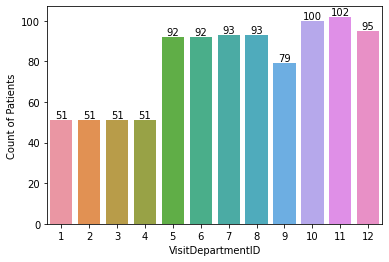

In [49]:
#25 Plot a graph by counting the no. of patients in each department

df = pd.read_excel("HospitalDatabase .xlsx","AmbulatoryVisits")
df1 = df.groupby(['VisitDepartmentID'])['PatientMRN'].count().reset_index(name = 'Count of Patients')
ax = sns.barplot(x='VisitDepartmentID', y='Count of Patients', data=df1)#,order=df1.sort_values('Count of Patients').Service )
for i in ax.containers:
    ax.bar_label(i,)

In [48]:
#26 Using arrays and loops, find the count of patients based on gender

df = pd.read_excel("HospitalDatabase .xlsx","Patients")
arr = df[['Gender','PatientID']].to_numpy()
Male = 0
Female = 0
for i in arr:
    if i[0]=='Male':
        Male +=1
    else:
        Female +=1
print('Count of Male Patients:',Male)
print('Count of Female Patients:',Female)

Count of Male Patients: 537
Count of Female Patients: 408


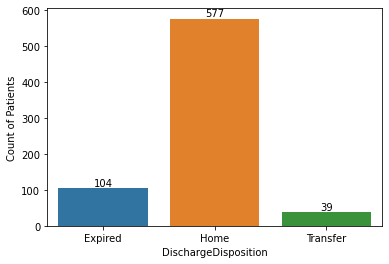

In [47]:
#27 Plot a graph to count the patients based on discharge disposition

df = pd.read_excel("HospitalDatabase .xlsx","ReAdmissionRegistry")
df1 = df.groupby(['DischargeDisposition'])['PatientID'].count().reset_index(name = 'Count of Patients')
ax = sns.barplot(x='DischargeDisposition', y='Count of Patients', data=df1 )
for i in ax.containers:
    ax.bar_label(i,)

In [46]:
#28 Which reason of visit has maximum mortality rate

df = pd.read_excel("HospitalDatabase .xlsx", "Discharges")
df1 = df[df['DischargeDisposition']=='Expired']
df2 = pd.read_excel("HospitalDatabase .xlsx", "EDVisits")
df3 = (df2.loc[(df1.PatientID)])
df4 = df3.groupby(['ReasonForVisit'])['PatientID'] \
.count() \
.reset_index(name = 'Mortality Rate') \
.sort_values(['Mortality Rate'],ascending=False)\
.head(1)
df4

,ReasonForVisit,Mortality Rate
8,Pneumonia,23


In [45]:
#29 Claculate average LOS

df=pd.read_excel("HospitalDatabase .xlsx", "Discharges")
df[["DischargeDate","AdmissionDate"]] = df[["DischargeDate","AdmissionDate"]].apply(pd.to_datetime)
df["los"] = (df["DischargeDate"]-df["AdmissionDate"])/np.timedelta64(1, 'D')
df["avg_los"]= df["los"].sum()/df["los"].count()
print("Average LOS: %f"%df["avg_los"].head(1))

Average LOS: 10.025932


In [44]:
#30 Which Patient id has most entries in readmission registry

df = pd.read_excel("HospitalDatabase .xlsx","ReAdmissionRegistry",header=None,index_col=False)[1]
df1=df.value_counts().index[0]
print('PatientID',df1,'has most entries in readmission registry')

PatientID 23 has most entries in readmission registry


In [43]:
#31 Find the count of White Spanish Male

df = pd.read_excel("HospitalDatabase .xlsx","Patients")
df1 = df[(df['Gender']=='Male')&(df['Race']=='White')&(df['Language']=='Spanish')]
cnt = df1.count()
print('Count of White Spanish Male is',cnt[0])

Count of White Spanish Male is 15


In [42]:
#32 Write a function to print the multiplication of the given number

def mult(x):
    for i in range(10):
        print(number,"x",i+1,"=",number*(i+1))
number = int(input ("Enter the number to print the multiplication table: "))
mult(number)

Enter the number to print the multiplication table: 5
5 x 1 = 5
5 x 2 = 10
5 x 3 = 15
5 x 4 = 20
5 x 5 = 25
5 x 6 = 30
5 x 7 = 35
5 x 8 = 40
5 x 9 = 45
5 x 10 = 50


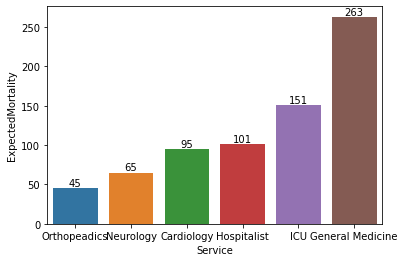

In [13]:
#33 Using a bar chart which Service had the lowest count of Expected Mortality

df = pd.read_excel("HospitalDatabase .xlsx","Discharges")
df1 = df.groupby(['Service'])['ExpectedMortality'].count().reset_index(name = 'ExpectedMortality')
ax = sns.barplot(x='Service', y="ExpectedMortality", data=df1,order=df1.sort_values('ExpectedMortality').Service )
for i in ax.containers:
    ax.bar_label(i,)

In [53]:
#34 np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

arr = np.arange(1,31)
newarr = arr.reshape(6,5)
print('Actual array: \n',newarr)
print('Sliced array: \n',newarr[2:4, 0:2])

Actual array: 
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Sliced array: 
 [[11 12]
 [16 17]]


In [54]:
#35 np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.

arr = np.arange(1,31)
narr = arr.reshape(6,5)
d1 = np.delete(narr,0,1)
d2 = np.delete(d1,[4,5],0)
d3 = np.diag(d2)
print('Actual array: \n',narr)
print('Sliced array: \n',d3)

Actual array: 
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Sliced array: 
 [ 2  8 14 20]


In [55]:
#36 Create a correlation matrix on EDVisits

df = pd.read_excel("HospitalDatabase .xlsx","EDVisits")
matrix = df.corr()
print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


In [56]:
#37 Write a function to print all the uppercase letter of a given sentence

def func(sent):
    upper = ''
    for i in sent:
        if i.isupper():
            upper += i
    return upper
sent = str(input ("Enter the sentence: "))
print('Uppercase Letters : ',func(sent))

Enter the sentence: Python Hackathon Sep 2022
Uppercase Letters :  PHS


In [57]:
#38 Number of patients on Transfer based on Primary Diagnosis

df = pd.read_excel("HospitalDatabase .xlsx", "Discharges")
df1 = df[df['DischargeDisposition']=='Transfer']
df2 = df1.groupby(['PrimaryDiagnosis'])['PatientID'] \
.count() \
.reset_index(name = 'Number of Patients on Transfer')
df2

,PrimaryDiagnosis,Number of Patients on Transfer
0,Afib,1
1,Diabetes,7
2,Flu,2
3,Heart Failure,9
4,Knee Replacement,1
5,Laceration,1
6,Pain,1
7,Pneumonia,8
8,Stroke,9


In [58]:
#39 Get the FirstName, LastName, DateOfBirth of the patients whose reason for visit is Migraine.

df = pd.read_excel("HospitalDatabase .xlsx", "EDUnique")
dfm = df[df['ReasonForVisit']=='Migraine']
dfp = pd.read_excel("HospitalDatabase .xlsx", "Patients")
x = (dfp.loc[(dfm.PatientID)])
print(x[['PatientID','FirstName','LastName','DateOfBirth']])

     PatientID FirstName  LastName             DateOfBirth
12          13   Skippie   Marriot 1978-05-12 20:12:54.106
14          15   Gabriel     Saint 1961-11-18 06:47:20.682
3            4   Carmine     Texas 1968-10-15 03:32:13.635
22          23    Walter      Time 1971-02-20 18:41:59.737
24          25  Lincoln     Brenda 1986-07-24 17:36:00.791
..         ...       ...       ...                     ...
870        871     Tabby    Bowler 1977-02-07 05:35:23.666
897        898    Melina  Siseland 1979-08-04 03:48:41.794
908        909  Freeland   Hawford 1985-02-08 22:19:00.712
910        911    Zulauf    Orbine 1973-06-26 03:13:50.449
924        925   Cynthie    Hurtic 1975-02-23 04:02:58.632

[116 rows x 4 columns]


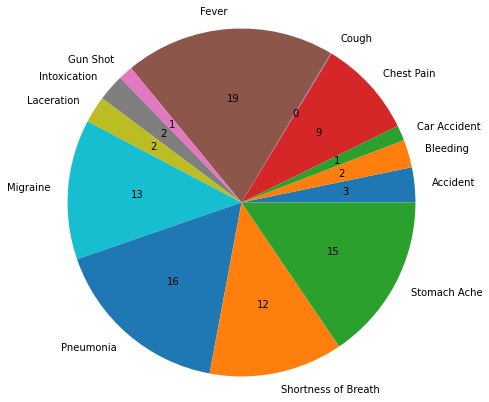

In [59]:
#40 Plot a graph showing the count of patients for the reason visited the hospital

df = pd.read_excel("HospitalDatabase .xlsx","EDVisits")
df1 = df.groupby(['ReasonForVisit'])['PatientID'].count().reset_index(name = 'Count of Patients')
x = df1['Count of Patients']
y = df1['ReasonForVisit']
plt.pie(x,labels = y,radius=2,autopct = "%d")
plt.show()